## Part 1

In [19]:
#This block contains the libraries - external pieces of python code we use to support the operations in this notebook.

#%%capture
# ^ if you would like to suppress the output from this block, uncomment the "%%capture" line. Try it out! 
import csv
import numpy as np
import pytz
import time
import pandas as pd
from datetime import datetime
import os
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import folium
from folium import plugins

In [2]:
#below, we read in the data.
#we will start with static data collected from a test sensor we sent to EKTU, which was deployed on campus.

aq = "ektu_static_data.csv" 

data = pd.read_csv(aq, engine='python') #contents of EKTU STATIC DATA

#then we set the timezone so the code knows what it is, and print ourselves a message to verify we read it in correctly
tiz = pytz.timezone('Asia/Thimphu')
print("aq read")

#if there's any accidentally duplicated data in the sheet, we omit it here
data.drop_duplicates(keep=False,inplace=True)

aq read


In [3]:
#here, we filter out any erroneous lat/lon values, like zeroes
data = data.loc[(data[['latitude', 'longitude']] != 0).all(axis=1)]
data = data[data[['latitude', 'longitude']].notnull().all(1)]

In [4]:
#now, we filter out any timestamp errors
data = data.loc[(data[['localtime']] > '2021-01-01').all(axis=1)]

In [5]:
#last, we filter out any data errors
data = data.loc[(data['humidity'] > 0)]
data = data.loc[(data['humidity'] < 100)]

data = data.loc[(data['temperature'] > -50)]
data = data.loc[(data['temperature'] < 80)]

data = data.loc[(data['PM25'] > -0.0001)]
data = data.loc[(data['PM25'] < 200)]

data = data.loc[(data['PM1'] > -0.0001)]
data = data.loc[(data['PM1'] < 200)]

data = data.loc[(data['PM10'] > -0.0001)]
data = data.loc[(data['PM10'] < 200)]

In [6]:
#we're all set up! now let's find some parameters from the deployment in time series - let's start with temperature! 
#this will be for the month of November.

#let's get some basic information about temperature from this deployment - 
#the average temperature the devices saw
#the maximum temperatures the devices saw
#the minimum temperature the devices sat 
tempavg = data['temperature'].mean()
tempmax = data['temperature'].max()
tempmin = data ['temperature'].min()

#now that we have those values, let's print them out so we can take a look
print("Avg Temp",tempavg, "Max Temp",tempmax, "Min Temp",tempmin)

Avg Temp -0.8209232954545463 Max Temp 21.73 Min Temp -16.57


Text(0, 0.5, ' Temperature (C)')

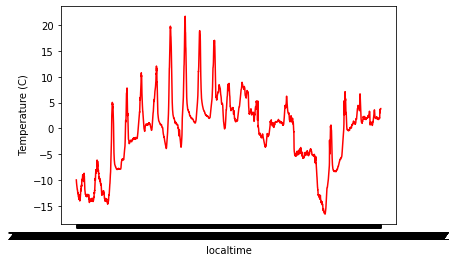

In [107]:
#great! now let's make a plot of the total temperature during the time we have collected the data for.

plt.plot(data["localtime"], data["temperature"], 'r')
plt.xlabel("localtime")
plt.ylabel(" Temperature (C)")

In [30]:
#in this block, write some code to find the average, minimum, and maximum humidity! 
#the parameter is 'humidity'

##
#ASK STUDENTS TO FILL THIS IN
## 

humavg = data['humidity'].mean()
hummax = data['humidity'].max()
hummin = data ['humidity'].min()

#now that we have those values, let's print them out so we can take a look
print("Avg Humidity",humavg, "Max Humidity",hummax, "Min Humidity",hummin)

Avg Humidity 68.61748224431821 Max Humidity 99.99 Min Humidity 23.73


Text(0, 0.5, ' Relative Humidity (%)')

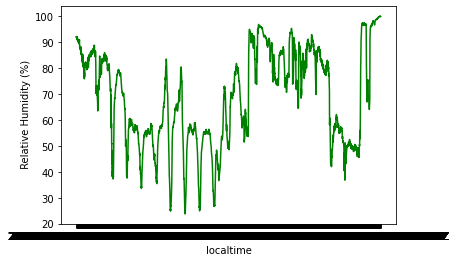

In [9]:
#great! now let's make a plot of the total humidity during the time we have collected the data for.

plt.plot(data["localtime"], data["humidity"], 'g')
plt.xlabel("localtime")
plt.ylabel(" Relative Humidity (%)")

In [10]:
#in this block, write some code to find the average, minimum, and maximum pm2.5! 
#the parameter is 'PM25'

##
#ASK STUDENTS TO FILL THIS IN
## 

pm25avg = data['PM25'].mean()
pm25max = data['PM25'].max()
pm25min = data ['PM25'].min()

#now that we have those values, let's print them out so we can take a look
print("Avg PM2.5",pm25avg, "Max PM2.5",pm25max, "Min PM2.5",pm25min)

Avg PM2.5 4.556157670454551 Max PM2.5 42.94 Min PM2.5 0.48


Text(0, 0.5, 'Pm 2.5')

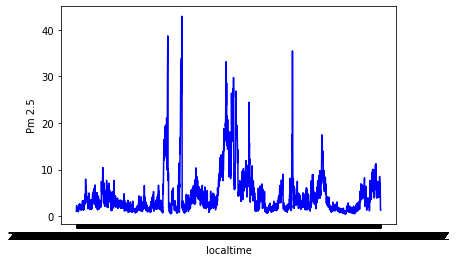

In [11]:
#great! now let's make a plot of the total PM 2.5 during the time we have collected the data for.

plt.plot(data["localtime"], data["PM25"], 'b')
plt.xlabel("localtime")
plt.ylabel("Pm 2.5")

In [13]:
#for the last section of part 1, let's see where this data is coming from!

#we're going to make a map. we start by setting a center point for the map to display the data
coords = data.loc[:,['latitude','longitude']].values
start_point=coords[0]

In [17]:
#here, we set up the specifications for the map
ektumap = folium.Map(location= start_point, tiles='Stamen Terrain', zoom_start=14)

#this will loop through the data and show us where it's coming from
for i,row in data.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), radius=4, weight=1, color='blue', fill_color='blue', fill_opacity=.5).add_to(ektumap)

#this will display our map! 
ektumap

#here we save an html version of the map - you can zoom in and out of it and interact with it!
#uncomment and run if you want to use
#ektumap.save('ektumap.html')


## Part 2

In [ ]:
#let's read in our new data below.
#this is data from a mobile City Scanner deployment in New York City, USA.

aq1 = "AQ_orgfid.csv" 

data = pd.read_csv(aq1, engine='python') #contents of AQ_orgfid_clean.csv

#then we set the timezone so the code knows what it is, and print ourselves a message to verify we read it in correctly
tiz = pytz.timezone('America/New_York')
print("aq1 read")

#if there's any accidentally duplicated data in the sheet, we omit it here
data.drop_duplicates(keep=False,inplace=True)

In [ ]:
#let's do the same data cleaning process as before - filter out any erroneous lat/lon values, like zeroes
data = data.loc[(data[['lat', 'long']] != 0).all(axis=1)]
data = data[data[['lat', 'long']].notnull().all(1)]

In [ ]:
#again, we filter out any timestamp errors
#data = data.loc[(data[['time']] > '2021-01-01').all(axis=1)]

In [ ]:
#once we do that, we set a center point for the map we are goign to make to display the data
coords = data.loc[:,['lat','long']].values
start_point=coords[0]

In [ ]:
#here, we set up the specifications for the map
Pm25map = folium.Map(location= start_point, tiles='Stamen Terrain', zoom_start=14)

#run the block as-is once, then have students uncomment the below line and run again to see the difference 
#data = data.loc[(data['pm25'] > 100)]

#we will start by plotting hotspots of PM2.5 on the map
for i,row in data.iterrows():
    #after you run this code block once, try changing these parameters to see what happens! 
    folium.CircleMarker((row.lat,row.long), radius=4, weight=1, color='red', fill_color='red', fill_opacity=.5).add_to(Pm25map)

#this will display our map! 
Pm25map

#here we save an html version of the map - you can zoom in and out of it and interact with it!
#uncomment and run if you want to use
#Pm25map.save('Pm25map.html')

